In [23]:
#dependencies
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [24]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [25]:
#shape of data
df.shape

(583, 11)

In [26]:
#columns that I will keep
columns_to_retain = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio','Dataset']

#after droping unnecessary columns, new dataset
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)

#drop the rows with missing values
df = df.dropna(axis=0)

In [27]:
#transform the non-numeric data in the columns into number
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#after cleaning the dataset(Here, htn value 1 means yes. But classification value 0 means disease detected)
df.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.7,0.1,71,6,8,6.8,3.3,0.90,0
1,10.9,5.5,235,54,86,7.5,3.2,0.74,0
2,7.3,4.1,201,50,58,7.0,3.3,0.89,0
3,1.0,0.4,66,4,10,6.8,3.4,1.00,0
4,3.9,2.0,79,17,49,7.3,2.4,0.40,0


In [29]:
#splitting the dataset into independant (x) data set for the features and dependant (y) dataset for the target
x = df.drop(['Dataset'], axis=1)
y = df['Dataset']

In [30]:
#scaling the dataset to bring all the values between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [31]:
#split data into train, test and shuffle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [32]:
#building model
model = Sequential()
model.add(Dense(256, input_dim = len(x.columns), kernel_initializer=k.initializers.random_normal(seed=13),activation='relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))

In [33]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [34]:
#train the model
history = model.fit(x_train, y_train, epochs = 1000, batch_size = x_train.shape[0])

Epoch 1/1000
463/463 [==============================] - 0s 220us/step - loss: 0.6973 - accuracy: 0.3607
Epoch 2/1000
463/463 [==============================] - 0s 4us/step - loss: 0.6923 - accuracy: 0.5378
Epoch 3/1000
463/463 [==============================] - 0s 4us/step - loss: 0.6858 - accuracy: 0.7041
Epoch 4/1000
463/463 [==============================] - 0s 6us/step - loss: 0.6800 - accuracy: 0.7084
Epoch 5/1000
463/463 [==============================] - 0s 4us/step - loss: 0.6739 - accuracy: 0.7084
Epoch 6/1000
463/463 [==============================] - 0s 9us/step - loss: 0.6679 - accuracy: 0.7084
Epoch 7/1000
463/463 [==============================] - 0s 2us/step - loss: 0.6620 - accuracy: 0.7084
Epoch 8/1000
463/463 [==============================] - 0s 4us/step - loss: 0.6563 - accuracy: 0.7084
Epoch 9/1000
463/463 [==============================] - 0s 6us/step - loss: 0.6508 - accuracy: 0.7084
Epoch 10/1000
463/463 [==============================] - 0s 7us/step - loss: 0.6

Epoch 81/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5287 - accuracy: 0.7084
Epoch 82/1000
463/463 [==============================] - 0s 6us/step - loss: 0.5285 - accuracy: 0.7084
Epoch 83/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5283 - accuracy: 0.7084
Epoch 84/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5282 - accuracy: 0.7084
Epoch 85/1000
463/463 [==============================] - 0s 6us/step - loss: 0.5280 - accuracy: 0.7084
Epoch 86/1000
463/463 [==============================] - 0s 2us/step - loss: 0.5278 - accuracy: 0.7084
Epoch 87/1000
463/463 [==============================] - 0s 6us/step - loss: 0.5276 - accuracy: 0.7084
Epoch 88/1000
463/463 [==============================] - 0s 6us/step - loss: 0.5274 - accuracy: 0.7084
Epoch 89/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5273 - accuracy: 0.7084
Epoch 90/1000
463/463 [==============================] - 0s 4us/step - lo

Epoch 160/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5165 - accuracy: 0.7127
Epoch 161/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5164 - accuracy: 0.7127
Epoch 162/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5162 - accuracy: 0.7127
Epoch 163/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5161 - accuracy: 0.7127
Epoch 164/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5159 - accuracy: 0.7127
Epoch 165/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5158 - accuracy: 0.7127
Epoch 166/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5156 - accuracy: 0.7127
Epoch 167/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5155 - accuracy: 0.7127
Epoch 168/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5153 - accuracy: 0.7127
Epoch 169/1000
463/463 [==============================] - 0s 4us

Epoch 239/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5043 - accuracy: 0.7127
Epoch 240/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5041 - accuracy: 0.7149
Epoch 241/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5040 - accuracy: 0.7149
Epoch 242/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5038 - accuracy: 0.7149
Epoch 243/1000
463/463 [==============================] - 0s 6us/step - loss: 0.5037 - accuracy: 0.7149
Epoch 244/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5036 - accuracy: 0.7149
Epoch 245/1000
463/463 [==============================] - 0s 6us/step - loss: 0.5034 - accuracy: 0.7171
Epoch 246/1000
463/463 [==============================] - 0s 4us/step - loss: 0.5033 - accuracy: 0.7171
Epoch 247/1000
463/463 [==============================] - 0s 6us/step - loss: 0.5032 - accuracy: 0.7171
Epoch 248/1000
463/463 [==============================] - 0s 4us

Epoch 318/1000
463/463 [==============================] - 0s 0us/step - loss: 0.4958 - accuracy: 0.7279
Epoch 319/1000
463/463 [==============================] - 0s 9us/step - loss: 0.4957 - accuracy: 0.7279
Epoch 320/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4956 - accuracy: 0.7300
Epoch 321/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4955 - accuracy: 0.7300
Epoch 322/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4955 - accuracy: 0.7300
Epoch 323/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4954 - accuracy: 0.7300
Epoch 324/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4953 - accuracy: 0.7279
Epoch 325/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4952 - accuracy: 0.7279
Epoch 326/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4951 - accuracy: 0.7322
Epoch 327/1000
463/463 [==============================] - 0s 4us

Epoch 397/1000
463/463 [==============================] - 0s 6us/step - loss: 0.4901 - accuracy: 0.7235
Epoch 398/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4900 - accuracy: 0.7235
Epoch 399/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4899 - accuracy: 0.7235
Epoch 400/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4899 - accuracy: 0.7235
Epoch 401/1000
463/463 [==============================] - 0s 6us/step - loss: 0.4898 - accuracy: 0.7235
Epoch 402/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4897 - accuracy: 0.7235
Epoch 403/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4897 - accuracy: 0.7235
Epoch 404/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4896 - accuracy: 0.7235
Epoch 405/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4896 - accuracy: 0.7257
Epoch 406/1000
463/463 [==============================] - 0s 4us

Epoch 476/1000
463/463 [==============================] - 0s 5us/step - loss: 0.4855 - accuracy: 0.7279
Epoch 477/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4854 - accuracy: 0.7279
Epoch 478/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4854 - accuracy: 0.7279
Epoch 479/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4853 - accuracy: 0.7279
Epoch 480/1000
463/463 [==============================] - 0s 0us/step - loss: 0.4852 - accuracy: 0.7279
Epoch 481/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4852 - accuracy: 0.7279
Epoch 482/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4851 - accuracy: 0.7279
Epoch 483/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4851 - accuracy: 0.7279
Epoch 484/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4850 - accuracy: 0.7279
Epoch 485/1000
463/463 [==============================] - 0s 4us

Epoch 555/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4814 - accuracy: 0.7365
Epoch 556/1000
463/463 [==============================] - 0s 5us/step - loss: 0.4814 - accuracy: 0.7365
Epoch 557/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4813 - accuracy: 0.7365
Epoch 558/1000
463/463 [==============================] - 0s 0us/step - loss: 0.4813 - accuracy: 0.7365
Epoch 559/1000
463/463 [==============================] - 0s 5us/step - loss: 0.4812 - accuracy: 0.7387
Epoch 560/1000
463/463 [==============================] - 0s 0us/step - loss: 0.4812 - accuracy: 0.7387
Epoch 561/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4811 - accuracy: 0.7387
Epoch 562/1000
463/463 [==============================] - 0s 0us/step - loss: 0.4811 - accuracy: 0.7387
Epoch 563/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4810 - accuracy: 0.7387
Epoch 564/1000
463/463 [==============================] - 0s 0us

Epoch 634/1000
463/463 [==============================] - 0s 3us/step - loss: 0.4773 - accuracy: 0.7365
Epoch 635/1000
463/463 [==============================] - 0s 5us/step - loss: 0.4773 - accuracy: 0.7365
Epoch 636/1000
463/463 [==============================] - 0s 3us/step - loss: 0.4772 - accuracy: 0.7343
Epoch 637/1000
463/463 [==============================] - 0s 0us/step - loss: 0.4772 - accuracy: 0.7343
Epoch 638/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4771 - accuracy: 0.7343
Epoch 639/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4771 - accuracy: 0.7343
Epoch 640/1000
463/463 [==============================] - 0s 3us/step - loss: 0.4770 - accuracy: 0.7343
Epoch 641/1000
463/463 [==============================] - 0s 0us/step - loss: 0.4770 - accuracy: 0.7343
Epoch 642/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4769 - accuracy: 0.7343
Epoch 643/1000
463/463 [==============================] - 0s 6us

Epoch 713/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4731 - accuracy: 0.7300
Epoch 714/1000
463/463 [==============================] - 0s 7us/step - loss: 0.4731 - accuracy: 0.7300
Epoch 715/1000
463/463 [==============================] - 0s 2us/step - loss: 0.4730 - accuracy: 0.7300
Epoch 716/1000
463/463 [==============================] - 0s 2us/step - loss: 0.4730 - accuracy: 0.7300
Epoch 717/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4729 - accuracy: 0.7300
Epoch 718/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4729 - accuracy: 0.7300
Epoch 719/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4728 - accuracy: 0.7300
Epoch 720/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4728 - accuracy: 0.7300
Epoch 721/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4727 - accuracy: 0.7300
Epoch 722/1000
463/463 [==============================] - 0s 4us

Epoch 792/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4689 - accuracy: 0.7365
Epoch 793/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4689 - accuracy: 0.7365
Epoch 794/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4688 - accuracy: 0.7343
Epoch 795/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4688 - accuracy: 0.7343
Epoch 796/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4687 - accuracy: 0.7365
Epoch 797/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4687 - accuracy: 0.7365
Epoch 798/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4686 - accuracy: 0.7365
Epoch 799/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4686 - accuracy: 0.7365
Epoch 800/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4685 - accuracy: 0.7365
Epoch 801/1000
463/463 [==============================] - 0s 4us

Epoch 871/1000
463/463 [==============================] - 0s 6us/step - loss: 0.4650 - accuracy: 0.7365
Epoch 872/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4649 - accuracy: 0.7365
Epoch 873/1000
463/463 [==============================] - 0s 6us/step - loss: 0.4649 - accuracy: 0.7365
Epoch 874/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4648 - accuracy: 0.7365
Epoch 875/1000
463/463 [==============================] - 0s 6us/step - loss: 0.4647 - accuracy: 0.7365
Epoch 876/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4647 - accuracy: 0.7365
Epoch 877/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4646 - accuracy: 0.7387
Epoch 878/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4646 - accuracy: 0.7387
Epoch 879/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4645 - accuracy: 0.7387
Epoch 880/1000
463/463 [==============================] - 0s 2us

Epoch 950/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4609 - accuracy: 0.7387
Epoch 951/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4608 - accuracy: 0.7365
Epoch 952/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4608 - accuracy: 0.7365
Epoch 953/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4607 - accuracy: 0.7365
Epoch 954/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4607 - accuracy: 0.7365
Epoch 955/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4606 - accuracy: 0.7365
Epoch 956/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4606 - accuracy: 0.7365
Epoch 957/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4605 - accuracy: 0.7365
Epoch 958/1000
463/463 [==============================] - 0s 4us/step - loss: 0.4605 - accuracy: 0.7365
Epoch 959/1000
463/463 [==============================] - 0s 4us

In [35]:
#save the model
#model.save('ckd.model')

Text(0.5, 0, 'epoch')

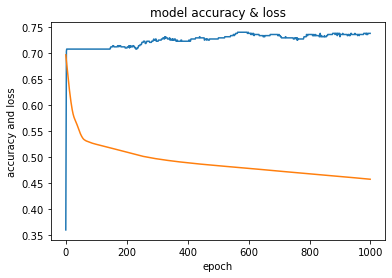

In [36]:
#visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [37]:
#Shape of training and testing data
print('shape of train data:', x_train.shape)
print('shape of test data:', x_test.shape)

shape of train data: (463, 8)
shape of test data: (116, 8)


In [38]:
#Showing the actual and predicted values
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]
#pred

print('Original: {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in pred)))

Original: 0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0
Predicted: 0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
